# Sprint Challenge
## *Data Science Sprint 13*

After a sprint of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). The data is sampled for you to something more manageable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. 

## Challenge Objectives
Successfully complete all these objectives to earn full credit. 

**Successful completion is defined as passing all the unit tests in each objective.**  

There are 8 total possible points in this sprint challenge. 


There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on Yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

____

# Before you submit your notebook you must first

1) Restart your notebook's Kernel

2) Run all cells sequentially, from top to bottom, so that cell numbers are sequential numbers (i.e. 1,2,3,4,5...)
- Easiest way to do this is to click on the **Cell** tab at the top of your notebook and select **Run All** from the drop down menu. 

3) **Comment out the cell that generates a pyLDAvis visual in objective 4 (see instructions in that section).** 
____

### Part 0: Import Necessary Packages
For this section, you will need to import:
- `spacy` 
- `Pandas`
- `Seaborn`
- `Matplotlib`
- `NearestNeighbors`
- `Pipeline` 
- `TfidfVectorizer`
- `KneighborsClassifier`
- `GridSearchCV`
- `corpora`
- `LdaModel`
- `gensim`
- `re`

> **Note: This assignment is optimized to work with these specific packages. You can use import different packages, but note that this may affect how CodeGrade works, and may cause CodeGrade to fail.**

In [3]:
# !python -m spacy download en_core_web_sm

In [4]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 68.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 79.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.3 which is incompatible.


In [5]:
# YOUR CODE HERE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re


from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

import gensim
import gensim.corpora as corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel

import pyLDAvis
import pyLDAvis.gensim 
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [6]:
# Visible Testing
assert pd.__package__ == 'pandas'




### Part 0: Import Data

In [7]:


# Load reviews from URL
data_url = 'https://raw.githubusercontent.com/bloominstituteoftechnology/data-science-practice-datasets/main/unit_4/unit1_nlp/review_sample.json'

# Import data into a DataFrame named df
# YOUR CODE HERE
df = pd.read_json(data_url, lines=True)
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


In [8]:
df.shape

(10000, 9)

In [9]:
df['text'][1]

'Came here for lunch Togo. Service was quick. Staff was friendly. No complaints here. Sweet tea is good. Parking can be a pain sometimes.'

In [10]:
# Visible Testing
assert isinstance(df, pd.DataFrame), 'df is not a DataFrame. Did you import the data into df?'
assert df.shape[0] == 10000, 'DataFrame df has the wrong number of rows.'

## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- Accept one document at a time
- Return a list of tokens

You are free to use any method you have learned this week.

**TO PASS CODEGRADE RUNTIME:**
- Do not run your tokenize function more than one time in your notebook! It is not needed until Part 4!

In [7]:
# Optional: Consider using spaCy in your function. The spaCy library can be imported by running this cell.
# A pre-trained model (en_core_web_sm) has been made available to you in the CodeGrade container.
# If you DON'T need use the en_core_web_sm model, you can comment it out below.

# nlp = spacy.load('en_core_web_sm')

In [11]:
def tokenize(doc):
# YOUR CODE HERE
   # order of operations - apply the expression from top to bottom
    email_regex = "From: \S*@\S*\s?"
    non_alpha = '[^a-zA-Z]'
    multi_white_spaces = "[ ]{2,}"
    punctuation = r'[^\w\s]'

    text = re.sub(email_regex, "", doc)
    text = re.sub(non_alpha, ' ', doc)
    text = re.sub(multi_white_spaces, " ", doc)
    text = re.sub(punctuation, '', doc)
    # apply case normalization 
    tokens = [token.lower() for token in text.split() if len(token) > 2]
    return tokens

In [12]:
'''Testing'''
assert isinstance(tokenize(df.sample(n=1)["text"].iloc[0]), list), "Make sure your tokenizer function accepts a single document and returns a list of tokens!"

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews (i.e. create a doc-term matrix).
    * Name that doc-term matrix `dtm`

In [13]:
from numpy.lib.function_base import vectorize
# %%time
# YOUR CODE HERE
vect = TfidfVectorizer(stop_words='english', max_features=100)
dtm = vect.fit_transform(df['text'])
dtm = pd.DataFrame(dtm.todense())

# View the feature matrix as a DataFrame
dtm.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.437965,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.151095,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,...,0.118395,0.296108,0.000000,0.0,0.0,0.0,0.0,0.124692,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.360664,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.381265,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.258898,0.517596,0.000000,0.0,0.260941,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0



2. Write a fake review. Assign the text of the review to an object called `fake_review`. 
3. Query the fake review for the 10 most similar reviews, print the text of the reviews. 
    - Given the size of the dataset, use `NearestNeighbors` model for this. Name the model `nn`.

In [14]:
# Create and fit a NearestNeighbors model named "nn"
# YOUR CODE HERE
nn = NearestNeighbors(n_neighbors=10)
nn.fit(dtm)


NearestNeighbors(n_neighbors=10)

In [15]:
'''Testing.'''
assert nn.__module__ == 'sklearn.neighbors._unsupervised', ' nn is not a NearestNeighbors instance.'
assert nn.n_neighbors == 10, 'nn has the wrong value for n_neighbors'

In [16]:
# Create a fake review and find the 10 most similar reviews

# YOUR CODE HERE
fake_review = 'I am well pleased with this board. I had done quite a bit of research before I made my decision and I couldn’t be happier. The quality of this board far surpasses others within this price category. I’m a beginner and I find the stability to be outstanding. I LOVE the colors and look too.'

fake_review_vect = vect.transform([fake_review])

distances, indices = nn.kneighbors(fake_review_vect)

for index in indices.flatten():
    print(df['text'][index])

This is my favorite pizza place in Madison, the taste is incomparable.

The price is a bit much in terms of volume of food per cost, but that isn't much of a negative, as it's a result of the smaller amount of dough involved in their ultra-thin, ultra-delicious Neapolitan style wood-fired pizza. Quality over quantity, and oh, what quality.

I prefer the default margherita pizza, as nothing more is needed beyond tomato, basil and mozzarella, but there are many topping options to choose between, and none of them are anything but the finest quality. The dough is simple and perfect, only the necessary ingredients, so the flavors show through.

The quality does anything but dip as one ventures beyond the pizzas to the realms of fabulous salads (roasted beet with honey balsamic is my pick), and the lunch only "Pane Brutta" sandwiches (I absolutely love the caprese, probably more so even than the pizzas).

Do not leave without consuming the butterscotch budino dessert. Don't question it, just

In [17]:
# Visible Testing
assert isinstance(fake_review, str), "Did you write a review in the correct data type?"

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a pipeline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier.
    - Use that pipeline to train a model to predict the `stars` feature (i.e. the labels). 
    - Use that pipeline to predict a star rating for your fake review from Part 2. 



2. Create a parameter dict including `one parameter for the vectorizer` and `one parameter for the model`. 
    - Include 2 possible values for each parameter
        - **Keep the values for each parameter low. Extreme values will compromise runtime**
    - **Use `n_jobs` = 1** 
    - Due to limited computational resources on CodeGrader `DO NOT INCLUDE ADDITIONAL PARAMETERS OR VALUES PLEASE.`
    
    
3. Train the entire pipeline with a GridSearch
    - Name your GridSearch object as `gs`

In [18]:
# YOUR CODE HERE
max_featuers = 2000
vect = TfidfVectorizer(stop_words='english')
clf = RandomForestClassifier()

pipe = Pipeline([('vect', vect), ('clf', clf)])

parameters = {
    'vect__max_df': ([0.75, 0.60]),
    'clf__max_depth': ([10, 15])
}

gs = GridSearchCV(pipe, parameters, n_jobs=1)
gs.fit(df['text'], df['stars'])

predicted_stars = gs.predict([fake_review])

print("Predicted Star Rating for the Fake Review:", predicted_stars[0])

Predicted Star Rating for the Fake Review: 5


In [19]:
# Visible Testing
prediction = gs.predict(["This is your prediction statement."])[0]
assert prediction in df.stars.values, 'You gs object should be able to accept raw text within a list. Did you include a vectorizer in your pipeline?'

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
    - Set num_topics to `5`
    - Name your LDA model `lda`
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

When you instantiate your LDA model, it should look like this: 

```python
lda = LdaModel(corpus=corpus,
               id2word=id2word,
               random_state=723812,
               num_topics = num_topics,
               passes=1
              )

```

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

## Note about  pyLDAvis

**pyLDAvis** is the Topic modeling package that we used in class to visualize the topics that LDA generates for us.

You are welcomed to use pyLDAvis if you'd like for your visualization. However, **you MUST comment out the code that imports the package and the cell that generates the visualization before you submit your notebook to CodeGrade.** 

Although you should leave the print out of the visualization for graders to see (i.e. comment out the cell after you run it to create the viz). 

### 1. Estimate a LDA topic model of the review text

* Use the `tokenize` function you created earlier to create tokens.
* Create an `id2word` object. 
> Hint: Use `corpora.Dictionary`
* Create a `corpus` object.
> Hint: Use `id2word.doc2bow`
* Instantiate an `lda` model. 

>> Remember to read the LDA docs for more information on the various class attributes and methods available to you in the LDA model: https://radimrehurek.com/gensim/models/ldamodel.html

In [20]:
# Do not change this value 
num_topics = 5

In [21]:
# YOUR CODE HERE
df['clean_data'] = df['text'].apply(tokenize)


In [22]:
id2word = corpora.Dictionary(df['clean_data'])
id2word.filter_extremes(no_below=3, no_above=0.5)
corpus = [id2word.doc2bow(token) for token in df['clean_data']]
print(type(corpus))
print(len(corpus))

<class 'list'>
10000


In [23]:
from gensim.models.ldamulticore import LdaMulticore

lda = LdaMulticore(corpus=corpus,
                                      id2word=id2word,
                                      num_topics=num_topics, 
                                      chunksize=250,
                                      passes=20,              # Runtime related parameter
                                      per_word_topics=True,
                                      workers=10,             # Set based on your machine capability
                                      random_state=42)

#### Testing

In [24]:
# Visible Testing

assert lda.get_topics().shape[0] == 5, 'Did your model complete its training? Did you set num_topics to 5?'

#### 2. Create 2 visualizations of the results:
1. Create a visualization using pyLDAvis. Run the cell, then comment out your code before submission, leaving the visualization in the cell.

2. Create a visualization using the matplotlib library and utilizing the subplots function. Assign this visualization to a variable called `visual_plot`.


In [26]:
# !pip install 'pandas<2.0.0'


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 46.4 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.0.2
    Uninstalling pandas-2.0.2:
      Successfully uninstalled pandas-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [27]:
# Cell for pyLDAvis visualization
# YOUR CODE HERE
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda, corpus, id2word)
# vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.077932 -0.089141       1        1  27.001939
0     -0.032232  0.045382       2        1  26.155232
4     -0.142576  0.042848       3        1  23.598747
1     -0.025605 -0.097289       4        1  16.971917
2      0.122481  0.098201       5        1   6.272166, topic_info=      Term         Freq        Total Category  logprob  loglift
270  great  4207.000000  4207.000000  Default  30.0000  30.0000
611    she  2427.000000  2427.000000  Default  29.0000  29.0000
282    our  3559.000000  3559.000000  Default  28.0000  28.0000
191   food  4930.000000  4930.000000  Default  27.0000  27.0000
175   were  5835.000000  5835.000000  Default  26.0000  26.0000
..     ...          ...          ...      ...      ...      ...
93     had   305.967183  6363.282032   Topic5  -4.9878  -0.2658
72     but   270.960051  8073.067392   Topic5  -5.1093  -0.6253
41    that   247.603372  9296.843238   Topic5  -5.1994  -0.8566
69    been   211.900645  2358.278053   Topic5  -5.3551   0.3595
174   they   224.431408  8833.006844   Topic5  -5.2977  -0.9036

[465 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5708      4  0.874550   3040
249       1  0.376200  about
249       2  0.205815  about
249       3  0.126992  about
249       4  0.236469  about
...     ...       ...    ...
396       2  0.680074  youre
396       3  0.071751  youre
396       4  0.026517  youre
396       5  0.032756  youre
5948      2  0.939107    zoo

[1016 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 1, 5, 2, 3])

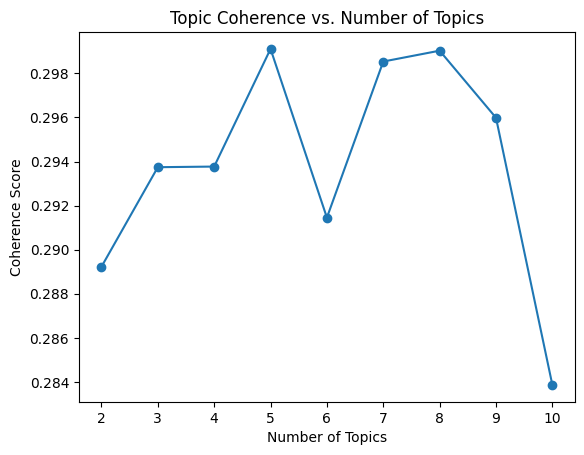

In [32]:
# Assume you have an LDA model
lda_model = lda
dictionary = id2word

# Set the range of topics to evaluate coherence
start_topic_num = 2
end_topic_num = 10
step = 1

# Initialize lists to store topic numbers and coherence scores
topic_nums = []
coherence_scores = []

# Iterate over different numbers of topics
for num_topics in range(start_topic_num, end_topic_num + 1, step):
    # Train the LDA model with the current number of topics
    current_lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary)
    
    # Compute the coherence score for the current model
    coherence = CoherenceModel(model=current_lda_model, texts=df['clean_data'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence.get_coherence()
    
    # Store the topic number and coherence score
    topic_nums.append(num_topics)
    coherence_scores.append(coherence_score)

# Create a line plot of topic coherence
fig, ax = plt.subplots()
visual_plot = ax.plot(topic_nums, coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Topic Coherence vs. Number of Topics')
plt.show()

In [33]:
# Visible Testing
assert visual_plot.__module__ == 'matplotlib.axes._subplots', "You must create and assign to visual_plot a visualization"


AttributeError: ignored

In [ ]:
""" """